Import libraries

In [1]:
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D
from keras.models import Sequential
import os 
import numpy as np
import warnings
import cv2
import pandas as pd 
warnings.filterwarnings("ignore")
import tensorflow as tf 
import random
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [136]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    
    tf.config.set_visible_devices(gpus[0], 'GPU')
    
    # Restrict TensorFlow to only allocate memory on the first GPU
    tf.config.experimental.set_memory_growth(gpus[0], True)


In [138]:
# Load data 
path = 'data/'

In [139]:
# Set paths for training and validation datasets 
path_train_male = os.path.join(path, 'Training', 'male')
path_train_female = os.path.join(path, 'Training', 'female')
path_val_male = os.path.join(path, 'Validation', 'male')
path_val_female = os.path.join(path, 'Validation', 'female')

Training data 

In [140]:
# Load training data from male directory
list_train_male = os.listdir(path_train_male)
training_male = []

for i in range(len(list_train_male)):
   img_path = os.path.join(path_train_male, list_train_male[i])
   img_read = cv2.imread(img_path)

   # Resize the image to 64x64 pixels
   img = cv2.resize(img_read, (64, 64))

   training_male.append([img, 0])   


In [134]:
# Load training data from female directory

list_train_female = os.listdir(path_train_female)
training_female = []

for i in range(len(list_train_female)):
    img_path = os.path.join(path_train_female, list_train_female[i])
    img_read = cv2.imread(img_path)
    
    # Resize the image to 64x64 pixels
    img = cv2.resize(img_read, (64, 64))
    training_female.append([img, 1])

KeyboardInterrupt: 

In [ ]:
# Combine each of the training datasets to one variable
training = training_male + training_female

Validation

In [ ]:
# Load validation data from male directory
list_val_male = os.listdir(path_val_male)
validation_male = []
for i in range(len(list_val_male)):
    img_path = os.path.join(path_val_male, list_val_male[i])
    img_read = cv2.imread(img_path)

       
    img = cv2.resize(img_read, (64, 64))
    validation_male.append([img, 0])


In [ ]:
# Load validation data from female directory
list_val_female = os.listdir(path_val_female)
validation_female = []

for i in range(len(list_val_female)):
    img_path = os.path.join(path_val_female, list_val_female[i])
    
    img_read = cv2.imread(img_path)
    img = cv2.resize(img_read, (64, 64))
    validation_female.append([img, 1])
    

In [ ]:
# Combine each of the validation datasets to one variable 
validation = validation_male + validation_female

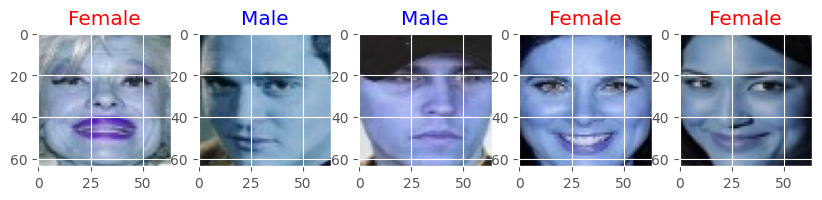

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    index = random.randint(0, len(training))
    c = training[index][1]
    plt.imshow(training[index][0])
    if c == 0:
        plt.title('Male', color='blue')
    else:
        plt.title("Female", color='red')
    

In [ ]:
for i in range(2):
    print(f"Training data", training[i][0].shape, end=' - ')

Training data (64, 64, 3) - Training data (64, 64, 3) - 

In [ ]:
# Shuffle the training  dataset
random.shuffle(training)

In [ ]:
# Shuffle the validation dataset
random.shuffle(validation)

In [ ]:
# Check the type of training variable
type(training)

list

In [ ]:
X_train, y_train  = [], []
# Append the training data to X_train and y_train
for i in range(len(training)):
    X_train.append(training[i][0])
    y_train.append(training[i][1])

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
# Convert lists to numpy 
print(X_train.shape)
print(y_train.shape)

(47009, 64, 64, 3)
(47009,)


In [ ]:
X_val, y_val = [], []
# Append the validation data to X_val and y_val 
for i in range(len(validation)):
    X_val.append(validation[i][0])
    y_val.append(validation[i][1])

In [ ]:
# Convert lists to numpy arrays
X_val = np.array(X_val)
y_val = np.array(y_val)

In [ ]:
print(X_val.shape)
print(y_val.shape)

(11649, 64, 64, 3)
(11649,)


In [ ]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0



# Augment the dataset using Image Data Generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

datagen.fit(X_train)

# 3. MODEL SEDERHANA DAN LEBIH DALAM
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Check data distribution
print(f"Training - Male: {np.sum(y_train == 0)}, Female: {np.sum(y_train == 1)}")
print(f"Validation - Male: {np.sum(y_val == 0)}, Female: {np.sum(y_val == 1)}")

# Check for data leakage
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")

Training - Male: 23766, Female: 23243
Validation - Male: 5808, Female: 5841
Training samples: 47009
Validation samples: 11649


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1 
)

# Fit the model with early stopping with GPU support
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=30,
    steps_per_epoch=len(X_train) // 32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/30
1469/1469 [==============================] - 60s 40ms/step - loss: 0.5236 - accuracy: 0.7265 - val_loss: 0.2236 - val_accuracy: 0.9146
Epoch 2/30
1469/1469 [==============================] - 60s 40ms/step - loss: 0.5236 - accuracy: 0.7265 - val_loss: 0.2236 - val_accuracy: 0.9146
Epoch 2/30
1469/1469 [==============================] - 58s 40ms/step - loss: 0.2781 - accuracy: 0.8904 - val_loss: 0.2141 - val_accuracy: 0.9216
Epoch 3/30
Epoch 3/30
1469/1469 [==============================] - 57s 39ms/step - loss: 0.2288 - accuracy: 0.9138 - val_loss: 0.1718 - val_accuracy: 0.9372
Epoch 4/30
1469/1469 [==============================] - 57s 39ms/step - loss: 0.2288 - accuracy: 0.9138 - val_loss: 0.1718 - val_accuracy: 0.9372
Epoch 4/30
1469/1469 [==============================] - 50s 34ms/step - loss: 0.2073 - accuracy: 0.9237 - val_loss: 0.1212 - val_accuracy: 0.9584
Epoch 5/30
1469/1469 [==============================] - 50s 34ms/step - loss: 0.2073 - accuracy: 0.9237 - val_los

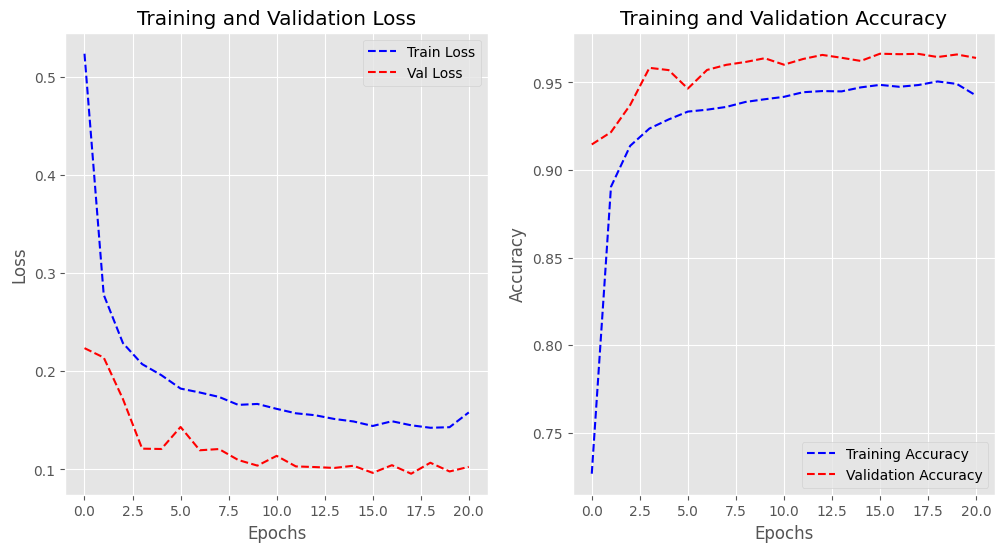

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Train Loss', linestyle='--', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', linestyle='--', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='--', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', color='red')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")

plt.legend()
plt.show()


In [ ]:
path = 'test/'
collected_images = []

with os.scandir(path) as entries:
    for entry in entries:
        if entry.is_file() and entry.name.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(path, entry.name)
            img_read = cv2.imread(img_path)

            if img_read is not None:
                img_resized = cv2.resize(img_read, (64, 64))
                collected_images.append(img_resized)
        else:
            print(f"File extension should be .jpg, .jpeg, or .png. Uploaded file: {entry.name}")

            

In [ ]:
if len(collected_images) > 0:
    # Normalize the collected images
    collected_images = np.array(collected_images).astype('float32') / 255.0

In [ ]:
collected_images = np.array(collected_images)

In [ ]:
# GPU Support for predictions
predictions = model.predict(collected_images)

1/1 [==============================] - 0s 305ms/step


In [ ]:
for i in range(len(collected_images)):
    if predictions [i][0] >= 0.5:
        result = "Female"
        confidence_rate = predictions[i][0] * 100
    elif predictions[i][0] < 0.5:
        result = "Male"
        confidence_rate = (1 - predictions[i][0]) * 100
    else:
        result = "Unknown"
        print("Can't recognize gender for this image.")
        

    print(f"Image {i+1}: {result}. Confidence: {confidence_rate:.2f}%")

Image 1: Male. Confidence: 84.58%
Image 2: Male. Confidence: 96.90%
Image 3: Female. Confidence: 64.37%
Image 4: Female. Confidence: 99.69%
Image 5: Male. Confidence: 99.82%
Image 6: Male. Confidence: 55.74%


In [ ]:
# # Save the model 
# save_model = model.save('my_model.h5')
# if save_model:
#     print("Model saved successfully.")